<center>
    
# Python For Quantum Mechanics
# Week 6: Scipy Fourier Transform

</center>

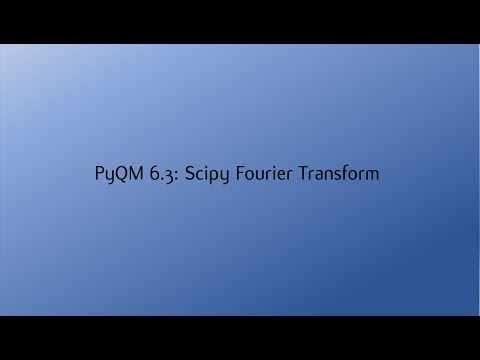

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('c5uvMbymfvQ',width=700, height=400)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy
import scipy.linalg as linalg
from scipy.fft import fft, fftfreq, fftshift

## The Fourier Transform

The Fourier transform changes a singnal into the frequencies of the waves that it make up. To transform a signal $f(t)$, we use the formula
$$ \hat{f}(\omega) = \int_{-\infty}^{+\infty}f(t)e^{-2\pi i \omega t}dt.$$

Scipy makes use of the discretised Fourier Transform:
$$\hat{f}_\omega = \sum_{n=0}^{N-1}f_n e^{-2\pi i \omega \frac{n}{N} }$$
where $f_n$ is the n-th element of an array of size $N$, and $\hat{f}_\omega$ is a new resulting array, of the same size, with each element dependent on the value of $\omega$.

For example:

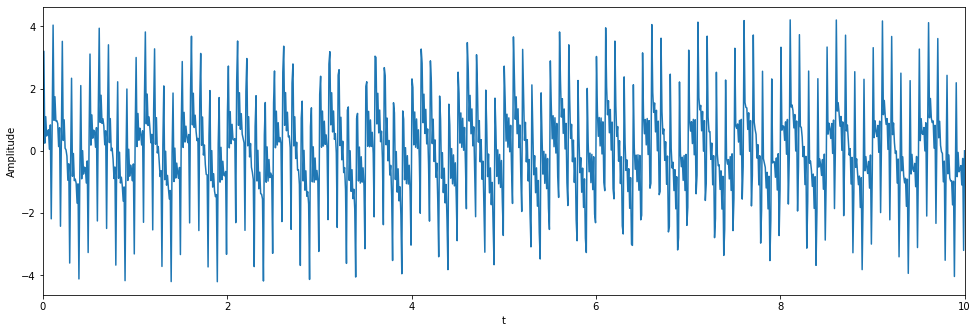

In [44]:
steps = 1000
t = np.linspace(0,10,steps)
w = [1.0,5.0,10.0,15.0,20.0]

signal = 0
for wi in w:
    signal += np.sin(wi*t*2*np.pi)

fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(t,noise)
ax.set_xlabel('t')
ax.set_ylabel('Amplitude')
ax.set_xlim(t[0],t[-1])
plt.show()

The function `fft(signal)` returns the Fourier transform and `fftfreq(n,h)` gives the array of frequencies that correspond to a number of times equal to `n` with gaps of `h` between them.

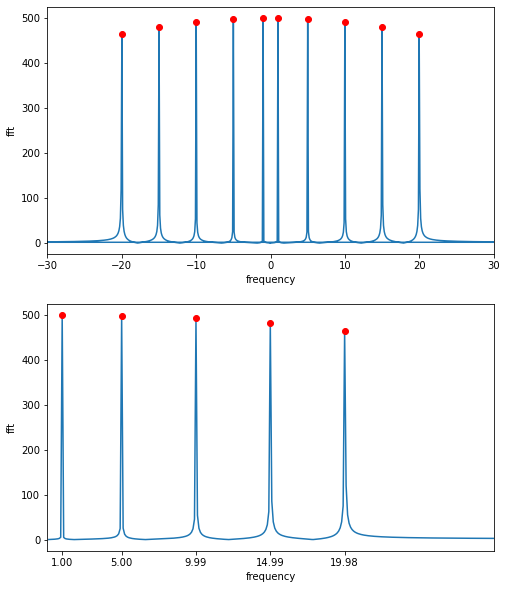

Fourier Transform Peak Frequencies = [ 0.999  4.995  9.99  14.985 19.98 ]


In [46]:
n = len(t)
h = t[1]-t[0]

Fourier = fft(signal)
freq = fftfreq(n, h)

fig, ax = plt.subplots(2,1,figsize=(8,10))

ax[0].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('fft')
ax[0].set_xlim(-30,30)

positive = freq > 0 # select only indices for elements that corresponds to positive frequencies
freq = freq[positive]
Fourier = Fourier[positive]

ax[1].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('fft')
ax[1].set_xlim(0,30)
ax[1].set_xticks(freq[abs(Fourier) > 300])

plt.show()

print('Fourier Transform Peak Frequencies =', freq[abs(Fourier) > 300])

## Wave Packet

We can create a more confined wave, called a wavepacket with the following function
$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$
Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

Omega = 8.0


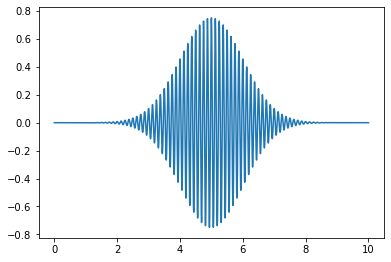

In [36]:
steps = 10000
x = np.linspace(0, 10, steps)
h = x[1]-x[0]
n = len(x)

f = 8*2*np.pi
print('Omega =', f/(2*np.pi))

sigma = 1.0

x0 = 5.0
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,packet.real)

plt.show()

Now lets perform a Fourier transform.

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


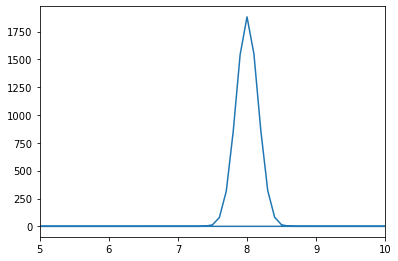

In [5]:
Fourier = fft(packet)
freq = fftfreq(n,h)

print('Omega = ', f/(2*np.pi))
m = abs(Fourier) >= max(abs(Fourier))
print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(freq, abs(Fourier))
ax.set_xlim(5, 10)

plt.show()

Notice that we obtain a normal distribution around the frequency of the wavepacket.

## The Uncertainty Principle

You may be familiar with the Heisenburg Uncertainty Principle for a quantum objects position and momentum(or time and energy), which states that the more we know about a particles position in space, the less we know about its momentum and vice versa. This is encapsulated in the formula

$$\Delta x \Delta p \geq \frac{\hbar}{2} $$

This is a result of position and momentum, in the quantum sense, being related by a Fourier transform. That is, if we take the Fourier transform of some noise, the more definitive the distribution of that noise, the more broad the distributions of possible frequencies in the Fourier transform. 

Take the above wave packet and change the value of $\sigma$, the width of the wave, and observe the resulting Fourier transform. For low values of $\sigma$, the resulting frequency distribution is broad. For high values of $\sigma$, the resulting frequency distribution sharpens at one frequency. 

In [6]:
def wavepacket(sigma, f):
    steps = 10000
    x = np.linspace(0, 10, steps)
    h = x[1]-x[0]
    n = len(x)

    f = f*2*np.pi
    print('Omega = ', f/(2*np.pi))


    x0 = 5.0
    packet = (1.0/(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

    fig1 = plt.figure()
    ax1 = fig1.add_axes([.1,.1,.8,.8])
    
    ax1.plot(x,packet.real)
    
    plt.show()
    
    Fourier = fft(packet)
    freq = fftfreq(n,h)

    print('Omega = ', f/(2*np.pi))
    m = abs(Fourier) >= max(abs(Fourier))
    print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

    fig2 = plt.figure()
    ax2 = fig2.add_axes([.1,.1,.8,.8])
    
    ax2.plot(freq, abs(Fourier))
    ax2.set_xlim(0, 20)
    
    plt.show()

Omega =  8.0


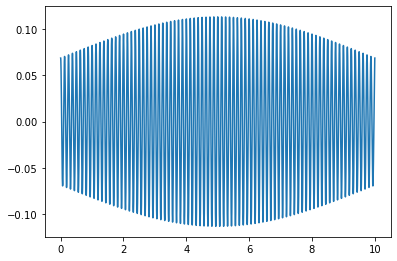

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


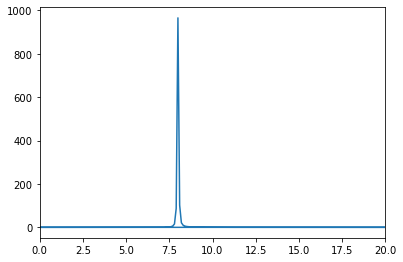

In [7]:
wavepacket(sigma=5.0,f=8)

Omega =  8.0


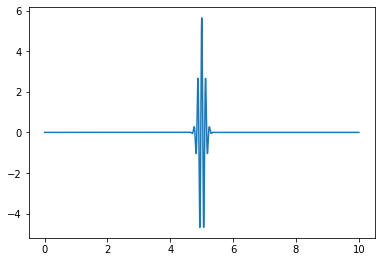

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


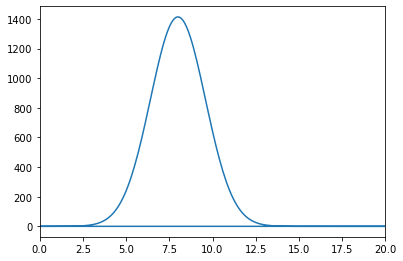

In [8]:
wavepacket(sigma=0.1,f=8)

Omega =  8.0


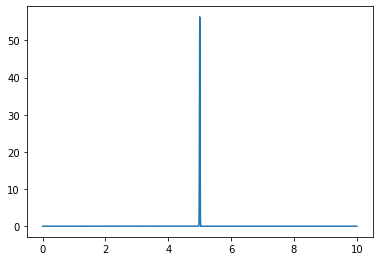

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


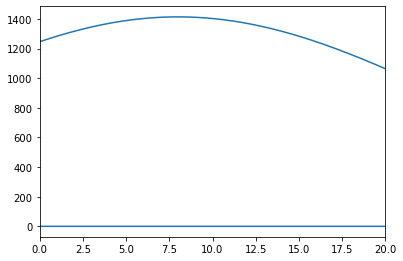

In [9]:
wavepacket(sigma=0.01,f=8)

## Quantum Fourier Transform

### Single Qubit

Recall that a quantum object can be represented by a superposition of basis states, where each basis state has a corresponding amplitude. Squaring the amplitude gives the probability of measuring the quantum object in that state. For a quantum object with $N$ basis states:

$$ |x> = x_0|0> + x_1|1> + x_2|2> + ... + x_{N-1}|N-1>$$

or more compactly

$$ |x> = \sum_{j=0}^{N-1}x_j|j> $$

For example, a single qubit with equal probability of being in basis states $|0>$ or $|1>$ is represented by

$$ |q> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$$

We can therefore fully represent this state in an array with elements $x_j$. We can change to another basis of states using a discrete fourier transform(with normalisation constant $1/\sqrt{N}$), changing the amplitudes $x_j$.

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j e^{-2\pi i k \frac{j}{N} }$$

Giving new amplitudes $y_k$ in a different basis.

$$ |y> = \sum_{k=0}^{N-1}y_k|k> $$

But this is just the same as using the discrete fourier transform in the above sections. 

Lets do an example, applying a quantum fourier transform to the following qubit

$$ |x> = x_0|0> + x_1|1>$$

$$y_0 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{0\times 0}{2}} + x_1e^{-2\pi i \frac{0\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 + x_1) $$

$$y_1 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{1\times 0}{2}} + x_1e^{-2\pi i \frac{1\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 - x_1) $$

Lets impliment this in scipy.

In [10]:
n=2
h = 1

x0 = 0
x1 = 1

x = np.array([x0,x1])

y = 1/np.sqrt(n)*fft(x)

print('|x> = ',x)
print('<x|x> = ',abs(x)**2,'\n')

print('|y> = ',y)
print('<y|y> = ',abs(y)**2)

|x> =  [0 1]
<x|x> =  [0 1] 

|y> =  [ 0.70710678+0.j -0.70710678-0.j]
<y|y> =  [0.5 0.5]


Representing $|x>$ as a vector, we can see that $|y>$ results from the multiplication of a Hadamard gate. So, Hadamard gates are closely related to the QFT.

$|x> = \begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $

$|y> = \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} $

$$ \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} =\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} = H\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $$

$$|y> = H|x> $$

In [11]:


x0 = 0
x1 = 1

x = np.array([x0,x1])

H = linalg.hadamard(2)

y = 1/np.sqrt(2)*H@x

print('|x> = ',x)
print('|y> = ',y)

|x> =  [0 1]
|y> =  [ 0.70710678 -0.70710678]


### Multiple Qubits

We can perform a Quantum Fourier Transform on multiple qubits, where each row in the array $x$ and $y$ represents a different qubit. For two qubits:

In [12]:
n=2
h = 1

x = np.array([[0,1],[1/np.sqrt(2),1/np.sqrt(2)]])

y = 1/np.sqrt(n)*fft(x)

print('|x> = ',x,'\n')
print('<x|x> = ',abs(x)**2, '\n')

print('|y> = ',abs(y),'\n')
print('<y|y> = ',abs(y)**2,'\n')

|x> =  [[0.         1.        ]
 [0.70710678 0.70710678]] 

<x|x> =  [[0.  1. ]
 [0.5 0.5]] 

|y> =  [[0.70710678 0.70710678]
 [1.         0.        ]] 

<y|y> =  [[0.5 0.5]
 [1.  0. ]] 



## The Bloch Sphere

We can represent the above transformations on the bloch sphere, using the parametrisation

$$|\psi> = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1> $$

So for $\phi=0$ and $\theta = \frac{\pi}{2}$

$$|\psi> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1> $$

And for $\phi=0$ and $\theta = \pi$

$$|\psi> = 0|0> + 1|1> $$

In [6]:
 def blochplot(phi,theta):
    #Defining the state
    psi = [np.cos(theta/2.0),np.exp(1j*phi)*np.sin(theta/2.0)]
    
    #printing it's probability amplitudes
    print('psi = {}|0> + {}|1>'.format(np.round(abs(psi[0]),2),np.round(abs(psi[1]),2)))
    print('psi prob = {} , {}'.format(np.round(abs(psi[0])**2,2),np.round(abs(psi[1])**2,2)))

    #Using spherical coordinates
    x=np.cos(phi)*np.sin(theta)
    y=np.sin(phi)*np.sin(theta)
    z=np.cos(theta)

    #Plotting a sphere of radius 1, with a black point at it's centre
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0,0,1,1],projection='3d')
    ax.grid(False)
    ax.set_axis_off()
    
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
    xsphere = np.cos(u)*np.sin(v)
    ysphere = np.sin(u)*np.sin(v)
    zsphere = np.cos(v)
    
    ax.plot_wireframe(xsphere, ysphere, zsphere, color="b",lw=0.3)
    ax.scatter([0], [0], [0], color="black", s=50)
    
    #Draw a new axis
    ax.plot([-2,2],[0,0],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[-2,2],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[0,0],[-2,2],color='black',linestyle='--')
    
    #Plotting Text Labels
    ax.text(0, -0.0, 1.3, r"$|0\rangle$", color='black',size=15)
    ax.text(0, -0.0, -1.5, r"$|1\rangle$", color='black',size=15)
    
    
    #ax.text(0, -1.5, -0.2, "|+>", color='black',size=15)
    #ax.text(0, 1.4, 0.2, "|->", color='black',size=15)

    #Plotting a vector of the quantum state.
    ax.plot([0,x],[0,y],[0,z], color='r')
    ax.scatter([x], [y], [z], color="red", s=50,marker= 'o')
    
    plt.show()

Suppose we are in the state $|0>$ with absolute certainty, then $\phi=0$ and $\theta=0$


$$|\psi> = 1|0> + 0|1> $$

This is represented on the bloch sphere as

psi = 1.0|0> + 0.0|1>
psi prob = 1.0 , 0.0


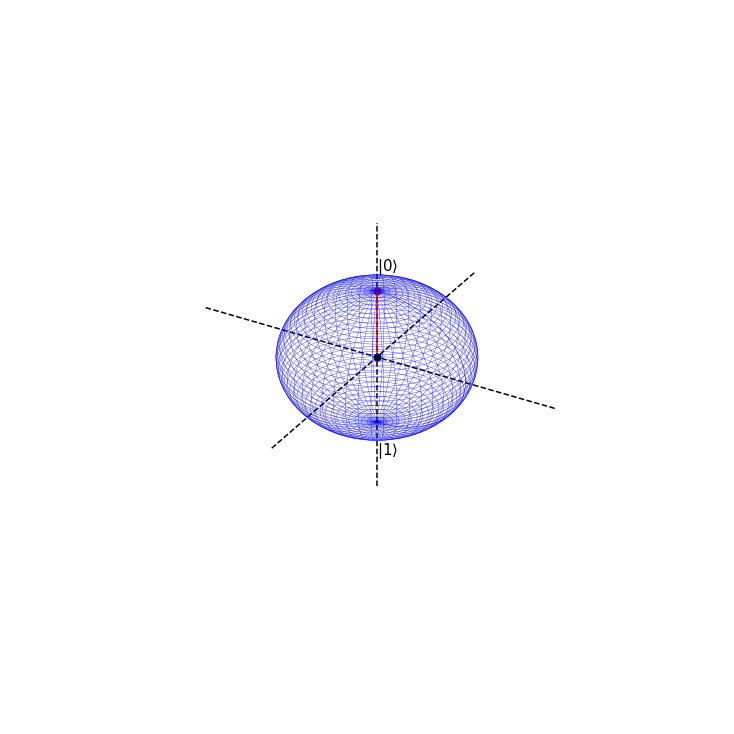

In [7]:
phi=0
theta = 0*np.pi

blochplot(phi,theta)

If we apply a QFT or Hadamard gate on $\psi$, the result will be the following state

$$\psi_H = H\psi = \frac{1}{\sqrt{2}}(x_0 + x_1)|0> + \frac{1}{\sqrt{2}}(x_0 - x_1)|1> = \frac{1}{\sqrt{2}}(|0>+|1>) $$

which has corresponding values $\phi=0$ and $\theta =\frac{\pi}{2} $.

psi = 0.71|0> + 0.71|1>
psi prob = 0.5 , 0.5


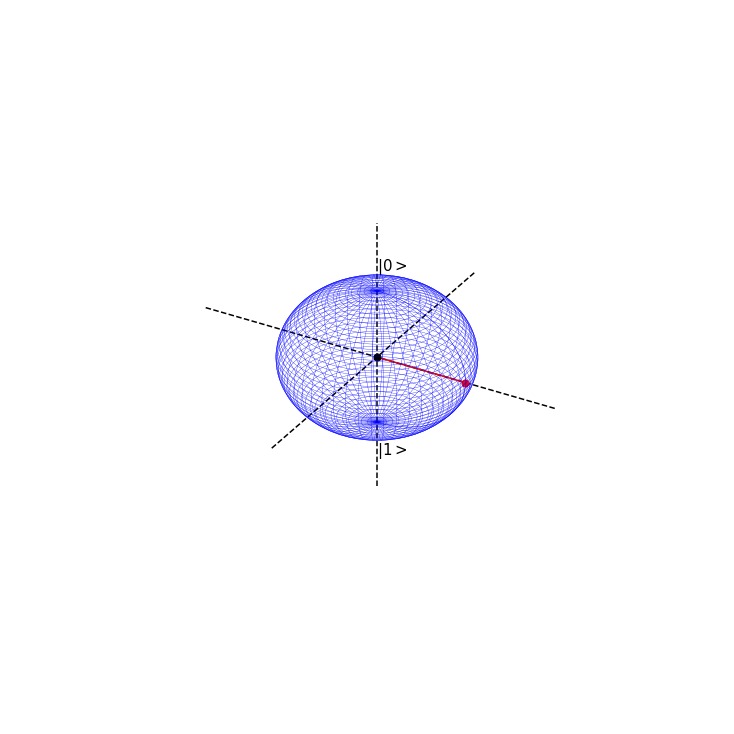

In [15]:
phi=0
theta = np.pi/2.0

blochplot(phi,theta)

This can be seen as an entirely new basis state. We shall label it as

$$|+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$
$$|-> =  \frac{1}{\sqrt{2}}(|0>-|1>) $$

Notice that when we have maximal certainty about our initial state $|\psi> = 1|0>+0|0>$, we have minimal uncertainty about the state we quantum fourier transform into

$$|+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$

The prior is definitely in the state $|0>$ but the latter has equal chance of being in state $|0>$ or $|1>$. However, in the latter, we know with absolute certainty that it is in state $|+>$, but

$$|\psi>= |0> =  \frac{1}{\sqrt{2}}(|+>+|->) $$ 

so we have maximal uncertainty as to whether the initial $|\psi>$ is in state $|+>$ or $|->$.

This is the uncertainty principle at work for qubit states. There is a trade off in knowledge about particular basis states, when we transform between them. 

So applying a Hadamrd gate, or QFT,  to our qubit rotates our qubit by $\frac{\pi}{/2}$ around the bloch sphere. 